<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/04.%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch04_04_%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9CEDA_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.04. 분류문제 EDA - titanic
---
* 날짜: 2022-05-11
* 이름: 박태현

## 학습내용
    - titanic 데이터 EDA
    - 분류문제 에서의 탐색적 데이터 분석 진행


## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [1]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


* seaborn에서 제공하는 `titanic` 데이터셋을 불러오기

In [3]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

* 데이터셋 일부 확인

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 결측지 비율 확인

In [6]:
df.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* 숫자 자료형의 기술 통계

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 숫자 자료형 외의 기술 통계

In [11]:
df.describe(include = 'bool')

,adult_male,alone
count,891,891
unique,2,2
top,True,True
freq,537,537


In [12]:
df.describe(include = 'category')

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


In [13]:
df.describe(include = 'object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


* 숫자 자료형 외 값 및 개수 확인

In [14]:
for col in ['adult_male', 'alone', 'class', 'deck','sex',	'embarked',	'who',	'embark_town',	'alive']:
  print(col)
  print(df[col].value_counts())

adult_male
True     537
False    354
Name: adult_male, dtype: int64
alone
True     537
False    354
Name: alone, dtype: int64
class
Third     491
First     216
Second    184
Name: class, dtype: int64
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
sex
male      577
female    314
Name: sex, dtype: int64
embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
who
man      537
woman    271
child     83
Name: who, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
alive
no     549
yes    342
Name: alive, dtype: int64


### **| 변수 요약**

* 속성을 그리기전 bool 값을 가지는 속성 `adult_male`과 `alone`을 int 값으로 변환해야 합니다.

In [20]:
df = df.astype({'adult_male':'int', 'alone' : 'int'})
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male        int64
deck           category
embark_town      object
alive            object
alone             int64
dtype: object

* 모든 속성의 분포 간단히 그리기

<function matplotlib.pyplot.show>

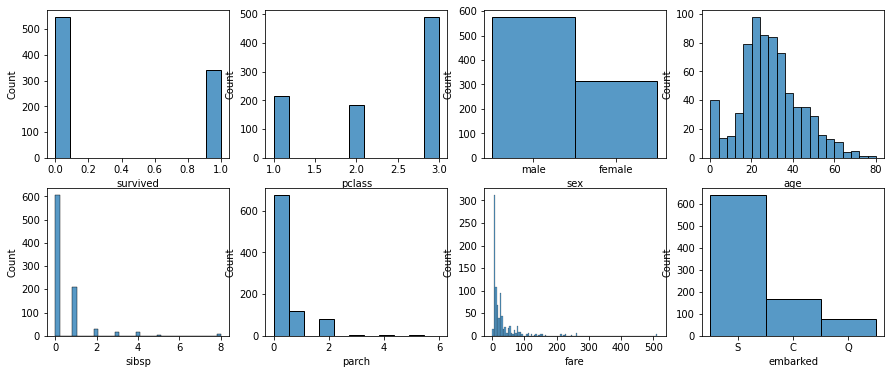

In [21]:
f, axes = plt.subplots(2, 4, figsize = (15,6))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
  sns.histplot(data = df, x = col, ax = ax)
plt.show

* 자료형 정리하기

In [45]:
nums = ['pclass',	'age',	'sibsp',	'parch',	'fare','adult_male', 'alone']
noms = ['class', 'deck','sex',	'embarked',	'who',	'embark_town','alive']
y = 'survived'

print('숫자/연속 자료형', nums)
print('범주 자료형', noms)
print('예측할 속성/변수', y)

숫자/연속 자료형 ['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']
범주 자료형 ['class', 'deck', 'sex', 'embarked', 'who', 'embark_town', 'alive']
예측할 속성/변수 survived


* 데이터 정리하기
  * 데이터 소개: 클래스와 나이에 따른 생존자 
  * 자료형 소개
  * 연속 자료형 : 
    * 'survived' : 당시 생존자
    * 'pclass' : 객실 클래스
    * 'age' : 연령
    * 'sibsp' : 함께 탑승한 배우자 또는 형제 수
    * 'parch' : 함께 탑승한 부모 또는 자녀 수
    * 'fare' : 티켓 번호
    * 'adult_male' : 성인 남성인지 아닌지
    * 'alone' : 혼자인지 아닌지
    * 'alive' : 현재까지 생존 여부
  * 범주 자료형 :
    * 'class' : 객실 클래스
    * 'deck' : 객실의 데크
    * 'sex' : 성별
    * 'embarked' : 탑승 장소
    * 'who' : 성별
    * 'embark_town' : 탑승 장소
  * 모델링을 위한 자료형 구분: 위와 동일



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

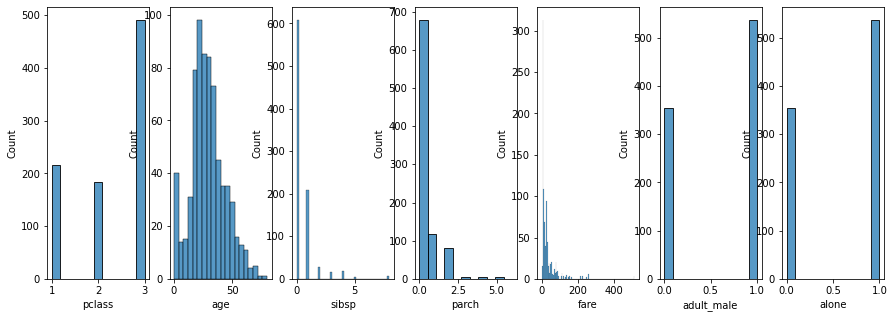

In [46]:
f, axes = plt.subplots(1, len(nums), figsize=(15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

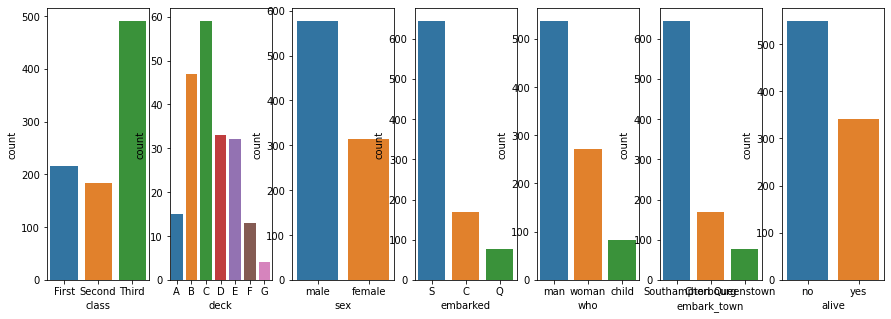

In [47]:
f, axes = plt.subplots(1, len(noms), figsize=(15,5))
axes = axes.flatten()
for col, ax in zip(noms, axes):
  sns.countplot(data=df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [48]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


* boxplot 으로 연속 자료형 기술 통계 시각화하기

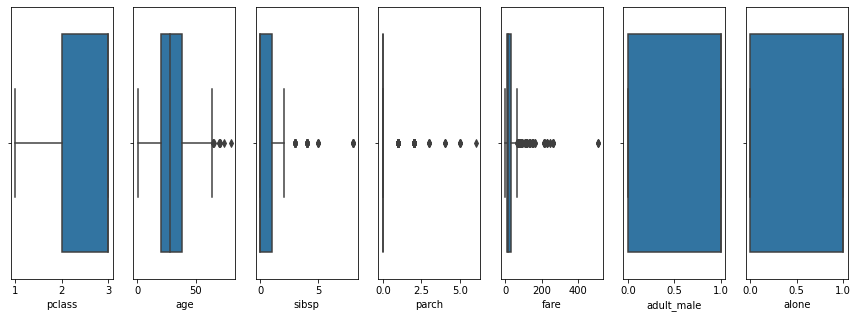

In [49]:
f, axes = plt.subplots(1, len(nums), figsize=(15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.boxplot(data=df, x=col, ax=ax)
plt.show()

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

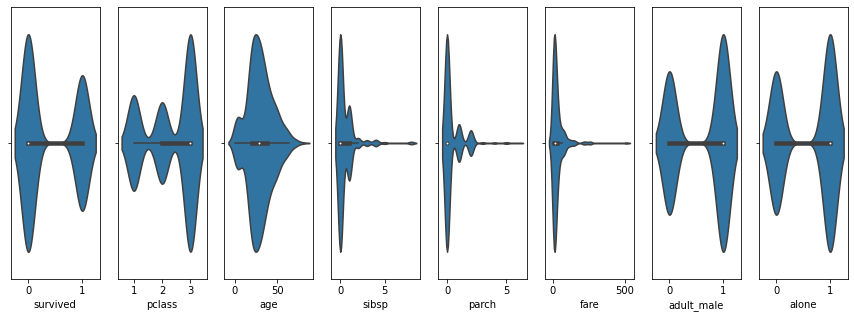

In [29]:
f, axes = plt.subplots(1, len(nums), figsize=(15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.violinplot(data=df, x=col, ax=ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [50]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

* `kurt` 이용해 첨도 구하기

In [51]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `countplot`으로 그리기


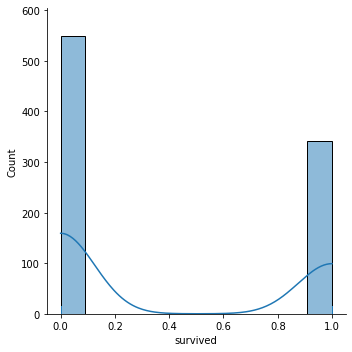

In [52]:
sns.displot(data=df, x=y, kde=True, rug=True) 

* `hue` 옵션에 범주형 속성 추가하기

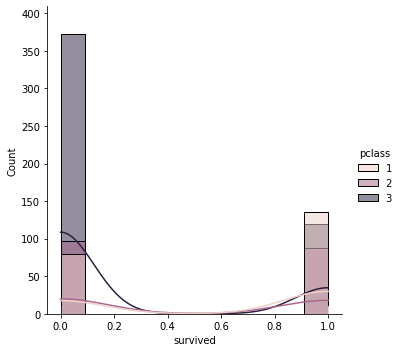

In [53]:
sns.displot(data=df, x= y, kde=True, rug=True, hue = 'pclass') 

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [54]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [55]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

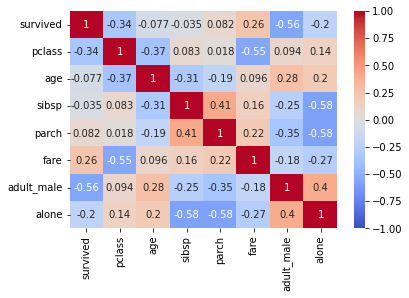

In [56]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1)

* 상관관계가 높은 속성 정리하기




In [57]:
# survived은 parch와 fare가 낮은 양의 관계
# sibsp와 age는 낮은 음의 관계
# pclass와 adult_male은 큰 음의 관계

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

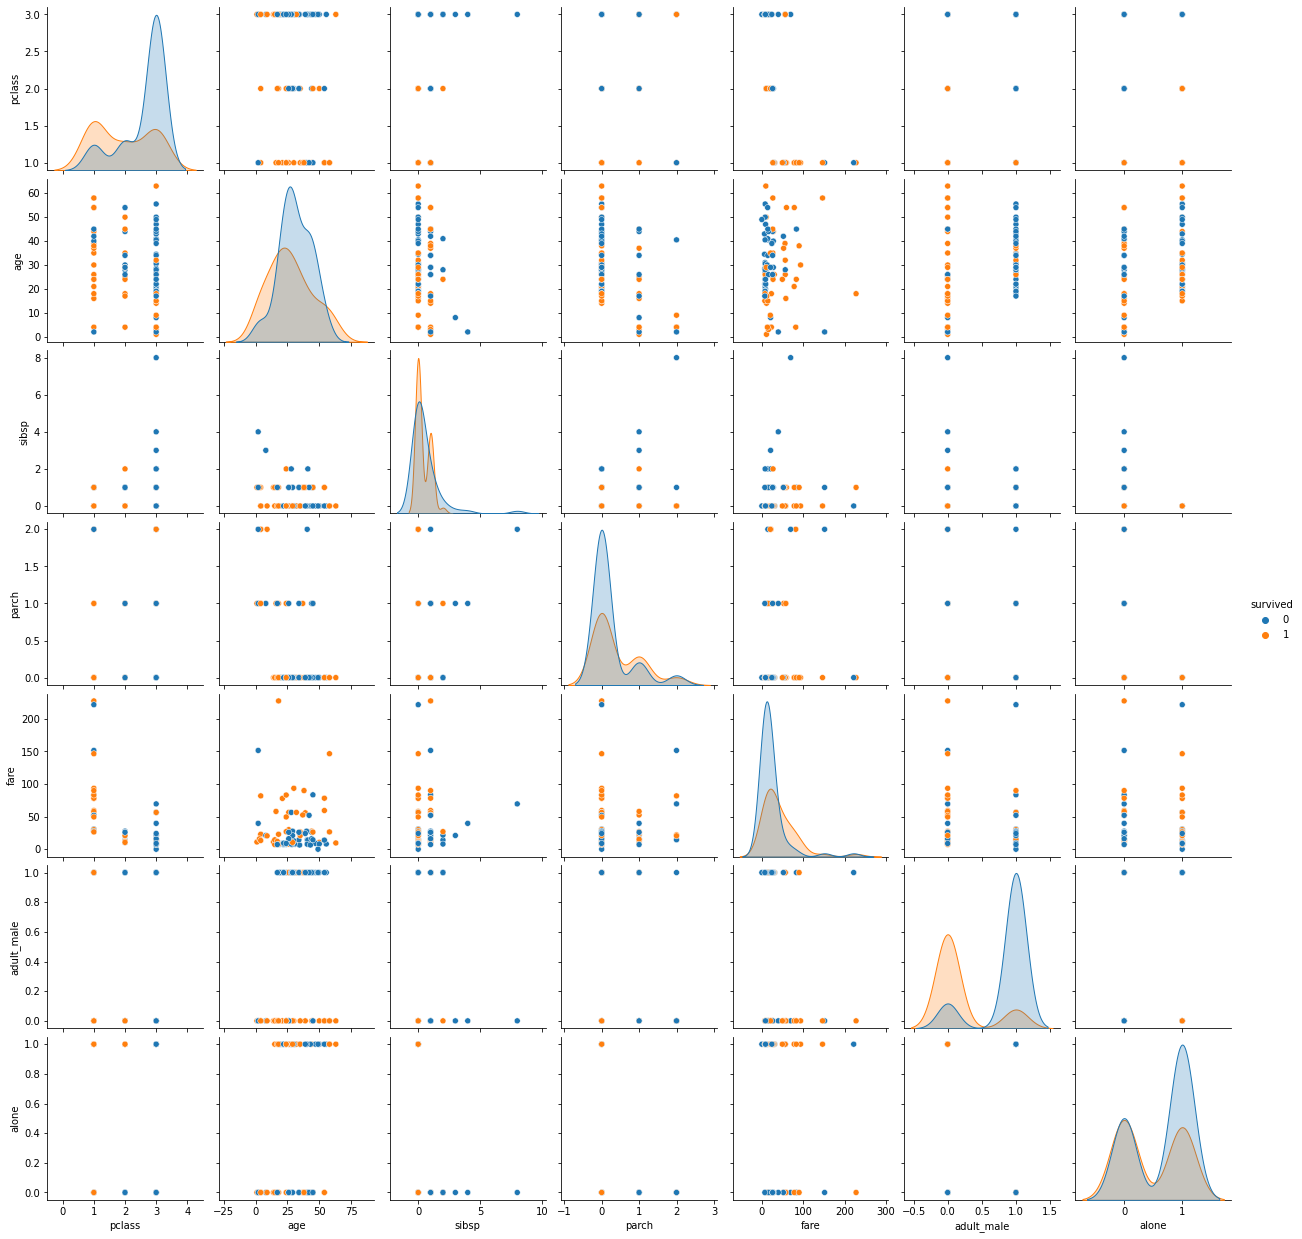

In [58]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
sns.pairplot(df.sample(100), hue = y)

* `displot` 이용해 연속 자료형 별 예측값의 분포 `kde` 선으로 시각화 하기 

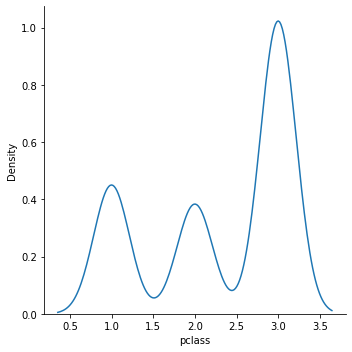

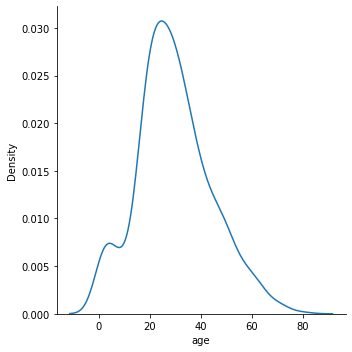

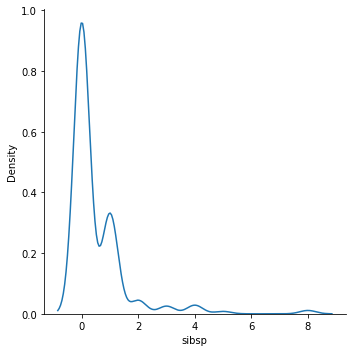

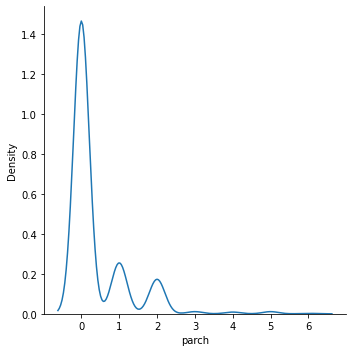

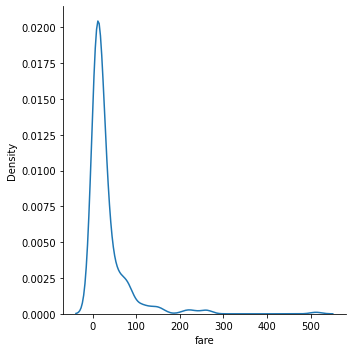

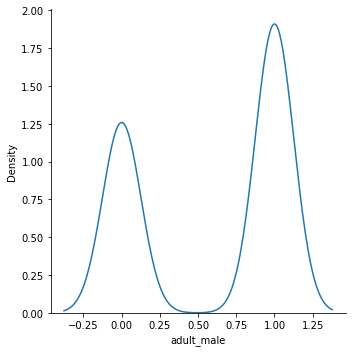

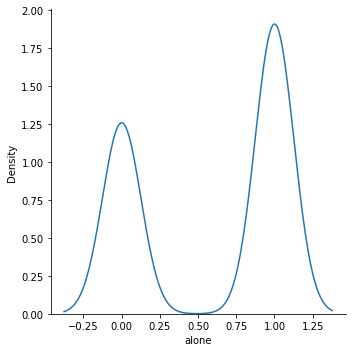

In [59]:
for col in nums:
  sns.displot(data = df, x = col, kind = 'kde')

* 위에서 그린 플롯에 `col` 옵션으로 `sex` 추가하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


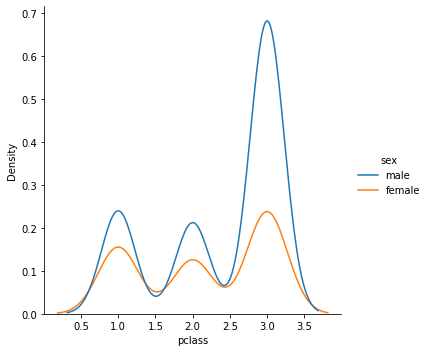

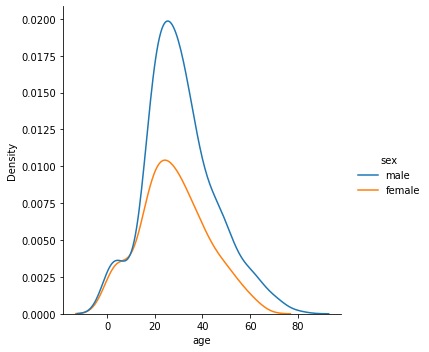

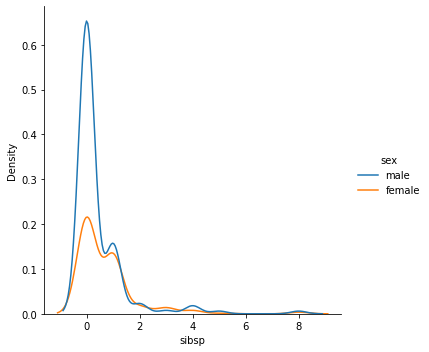

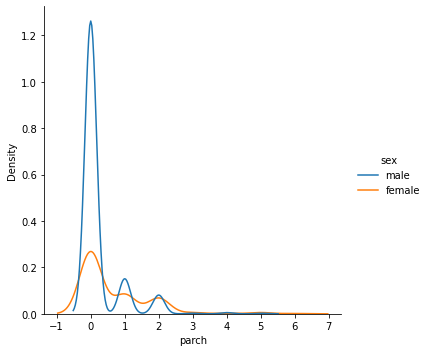

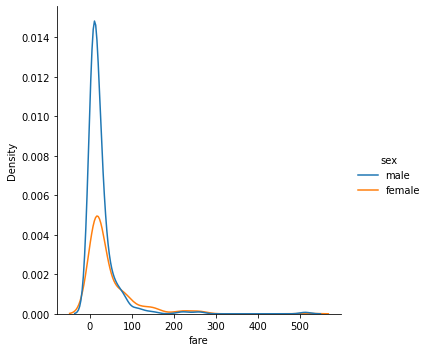

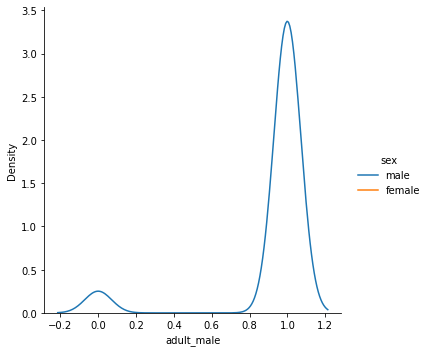

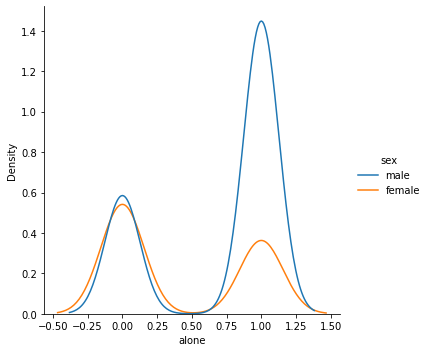

In [60]:
for col in nums:
  sns.displot(data = df, x = col, kind = 'kde', hue = 'sex')

* 위에서 그린 플롯에 `hue` 옵션으로 `class` 추가하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


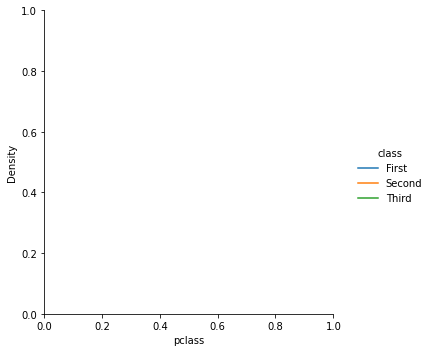

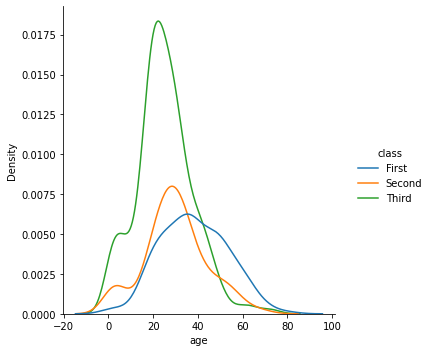

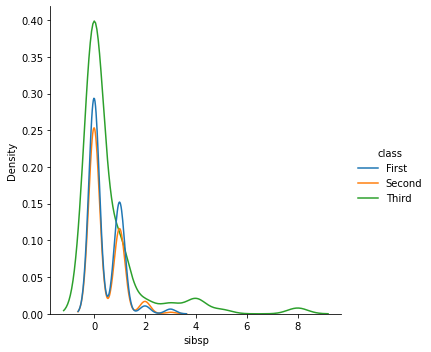

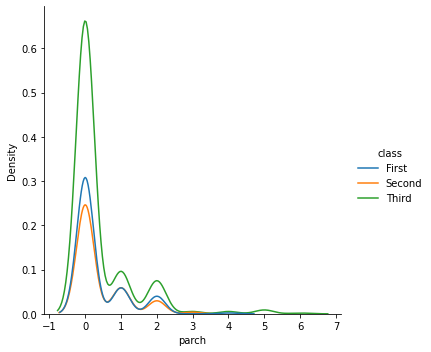

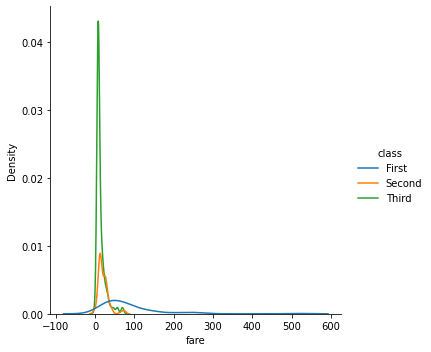

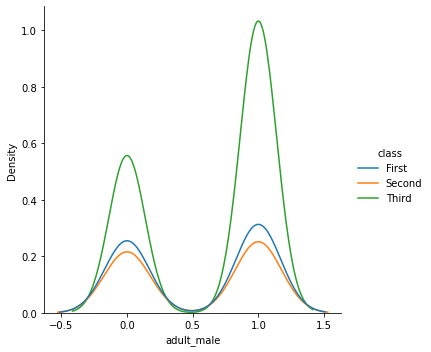

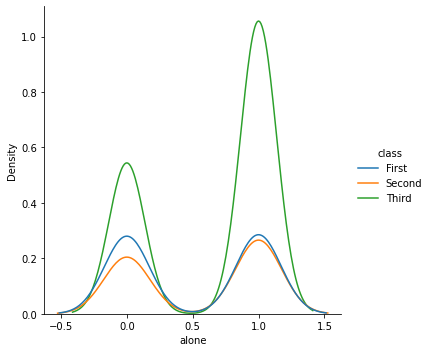

In [61]:
for col in nums:
  sns.displot(data = df, x = col, kind = 'kde', hue = 'class')

* `age`과 `fare`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

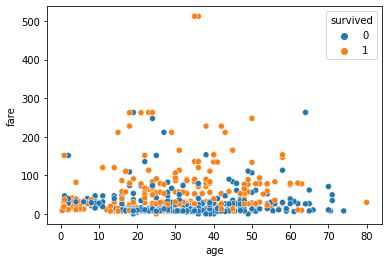

In [62]:
sns.scatterplot(data = df, x = 'age', y = 'fare', hue = y)

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `class` 추가하기

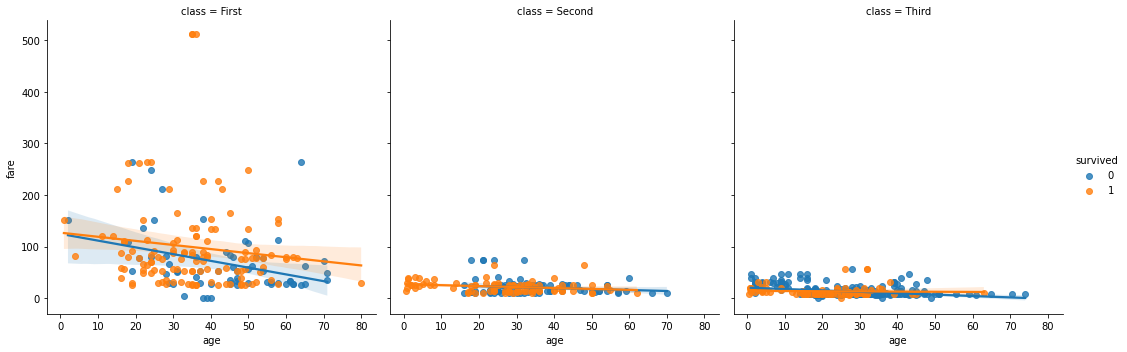

In [64]:
sns.lmplot(data = df, x = 'age', y = 'fare', hue = y, col = 'class')

* `histplot`으로 범주형 속성들과 예측값 히트맵 그리기

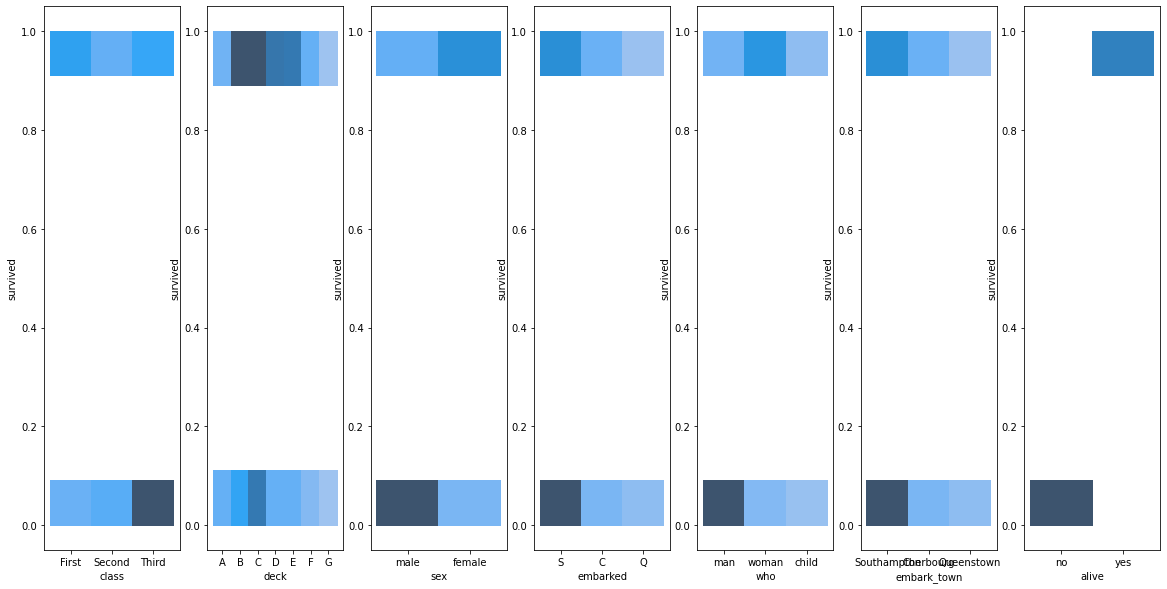

In [69]:
fig, axes = plt.subplots(1, len(noms), figsize = (20,10))
for col, ax in zip(noms, axes):
  sns.histplot(data = df, x = col, y = y, ax = ax)